<a href="https://colab.research.google.com/github/srush/raspy/blob/main/RASPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!git clone https://github.com/srush/raspy.git raspy-code
import sys
sys.path.append("raspy-code")

Cloning into 'raspy-code'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 38 (delta 13), reused 32 (delta 10), pack-reused 0
Unpacking objects: 100% (38/38), done.


In [19]:
from raspy import *
import matplotlib.pyplot as plt
import numpy as np
def show(self):
    plt.imshow(self.tomat())
    return ""
Selector._repr_html_ = show

In [6]:
code = identity + [1, 2, 3]

In [22]:
code([2,3,4])

[3, 5, 7]

[[True, False, False], [False, True, False], [False, False, True]]

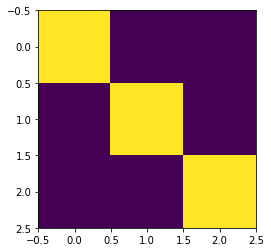

In [23]:
select(code, code, eq)([2,3,4])

In [31]:
def frac_prevs(sop, val):
    prevs = select(indices, indices, le)
    return aggregate(prevs, (sop == val), name="count" + val)


def pair_balance(open, close):
    opens = frac_prevs(tokens, open)
    closes = frac_prevs(tokens, close)
    return opens - closes


bal1 = pair_balance("(", ")")
bal2 = pair_balance("{", "}")

# Check for too many closes
negative = (bal1 < 0) | (bal2 < 0)
had_neg = aggregate(select_all, negative, name="neg") > 0

# Check for match
select_last = select(indices, length - 1, eq)
end_0 = aggregate(select_last, (bal1 == 0) & (bal2 == 0), name="check")

shuffle_dyck2 = end_0 & ~(had_neg)

In [27]:
shuffle_dyck2("((asasd({)}))")

[True, True, True, True, True, True, True, True, True, True, True, True, True]

In [29]:
shuffle_dyck2("((asasd({)})")

[False, False, False, False, False, False, False, False, False, False, False, False]

In [32]:
shuffle_dyck2("((asasd({)})").totree()

Number of layers 2

Layer 2 Head: check 

0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 
1 1 1 1 1 1 1 1 1 1 1 1 

Layer 2 Head: neg 

1 1 1 1 1 1 1 1 1 1 1 1 
1 1 1 1 1 1 1 1 1 1 1 1 
1 1 1 1 1 1 1 1 1 1 1 1 
1 1 1 1 1 1 1 1 1 1 1 1 
1 1 1 1 1 1 1 1 1 1 1 1 
1 1 1 1 1 1 1 1 1 1 1 1 
1 1 1 1 1 1 1 1 1 1 1 1 
1 1 1 1 1 1 1 1 1 1 1 1 
1 1 1 1 1 1 1 1 1 1 1 1 
1 1 1 1 1 1 1 1 1 1 1 1 
1 1 1 1 1 1 1 1 1 1 1 1 
1 1 1 1 1 1 1 1 1 1 1 1 

Layer 1 Head: count( 

1 1 1 1 1 1 1 1 1 1 1 1 
0 1 1 1 1 1 1 1 1 1 1 1 
0 0 1 1 1 1 1 1 1 1 1 1 
0 0 0 1 1 1 1 1 1 1 1 1 
0 0 0 0 1 1 1 1 1 1 1 1 
0 0 0 0 0 1 1 1 1 1 1 1 
0 0 0 0 0 0 1 1 1 1 1 1 
0 0 0 0 0 0 0 1 1 1 1 1 
0 0 0 0 0 0 0 0 1 1 1 1 
0 0 0 0 0 0 0 0 0 1 1 1 
0 0 0 0 0 0 0 0 0 0 1 1 
0 0 0 0 0 0 0 0 0 0 0 1 

Layer 1 Head